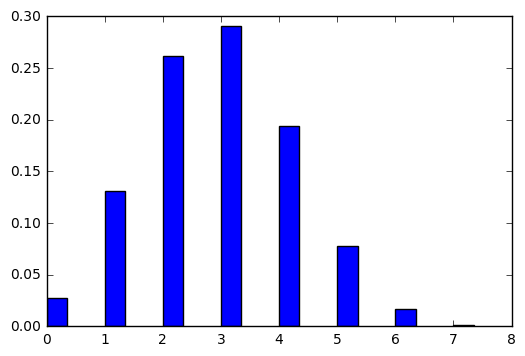

In [1]:
from scipy.stats import binom
import numpy as np
import matplotlib.pyplot as plt

n = 7
x = np.arange(n+1)
p0 = 0.4
width = 0.35
pmfvalues0 = binom.pmf(x, n, p0)
plt.bar(x, pmfvalues0, width, color='b')
plt.show()

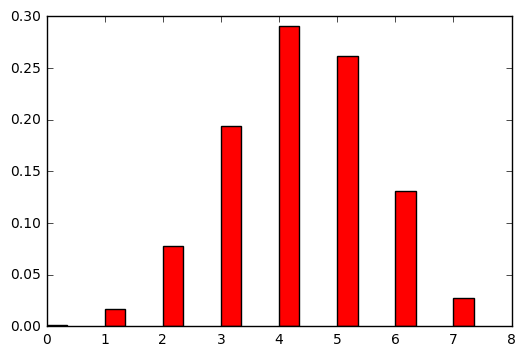

[0 1 2 3 4 5 6 7]


In [2]:
p1 = 1 - p0
width = 0.35
pmfvalues1 = binom.pmf(x, n, p1)
plt.bar(x, pmfvalues1, width, color='r')
plt.show()
print(x)

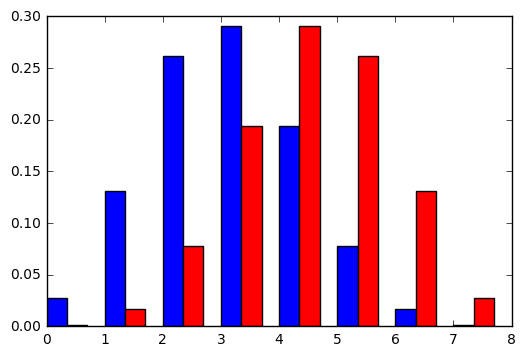

In [3]:
plt.bar(x, pmfvalues0, width, color='b')
plt.bar(x+0.35, pmfvalues1, width, color='r')
plt.show()

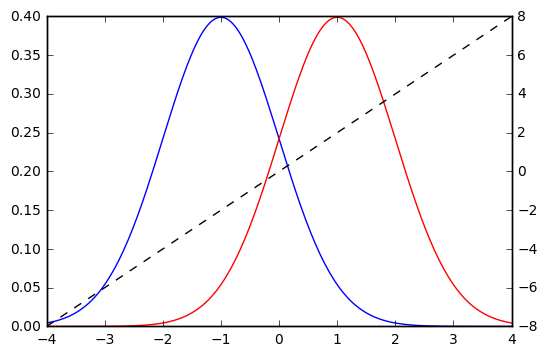

In [434]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

fig, ax1 = plt.subplots()
mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu0, sigma0))

mu1 = 1
variance1 = 1
sigma1 = math.sqrt(variance1)
x = np.linspace(-4, 4, 200)
ax1.plot(x,mlab.normpdf(x, mu1, sigma1),color='r')

ax2 = ax1.twinx()
ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--')

plt.show()

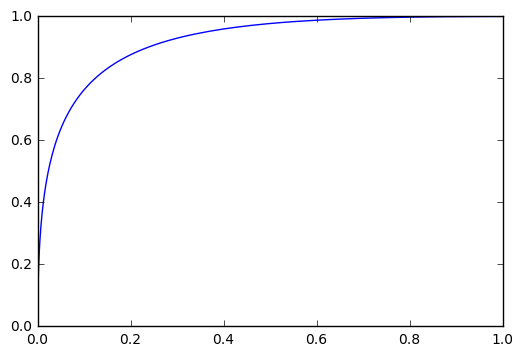

In [441]:
from scipy.stats import norm

fig, ax1 = plt.subplots()

x = np.linspace(-4, 4, 200)
mu = 1
ax1.plot(norm.cdf((x-1)/sigma1),norm.cdf((x+1)/sigma0))
plt.show()

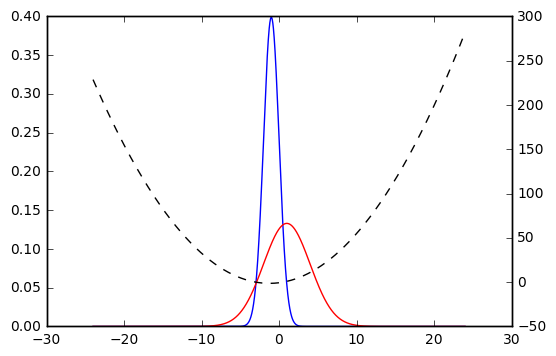

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.mlab as mlab
import math

fig, ax1 = plt.subplots()

mu0 = -1
variance0 = 1
sigma0 = math.sqrt(variance0)
x = np.linspace(-24, 24, 5000)
datapoint1 = ax1.plot(x,mlab.normpdf(x, mu0, sigma0),'b-')

mu1 = 1
variance1 = 9
sigma1 = math.sqrt(variance1)
x = np.linspace(-24, 24, 5000)
datapoint2 = ax1.plot(x,mlab.normpdf(x, mu1, sigma1),'r-')

ax2 = ax1.twinx()
datapoint3 = ax2.plot(x,np.log(mlab.normpdf(x, mu1, sigma1)) - np.log(mlab.normpdf(x, mu0, sigma0)),'k--')


plt.show()

In [14]:
xy_threshold = datapoint3[0].get_xydata()
x = datapoint3[0].get_xdata()
y = datapoint3[0].get_ydata()

In [15]:
from scipy.stats import norm
def get_xvalue(yvalue):
    final_arr = []
    tol = 1e-03
    yindex = np.where(y==yvalue)
    while(len(yindex[0]) <= 1):
        yindex = np.where(np.isclose(y,yvalue,atol=tol))
        tol = tol+0.0001
    if(len(yindex[0])>2):
        final_arr = [yindex[0][0],yindex[0][len(yindex[0])-1]]
    elif(len(yindex[0])==2):
        final_arr = yindex
    return x[final_arr]

[-1.25305061 -1.24344869]


In [469]:
yspace = np.linspace(0,2,10)
roc_x = []
roc_y = []
for round in range(10):
    xvalue = get_xvalue(yspace[round])
    area_blue = norm.cdf((xvalue[1]-mu0)/variance0)-norm.cdf((xvalue[0]-mu0)/variance0)
    area_red = norm.cdf((xvalue[0]-mu1)/variance1)+1-norm.cdf((xvalue[1]-mu1)/variance1)
    roc_x.append(area_blue)
    roc_y.append(area_red)
print(roc_x)
print(roc_y)


[0.90923682277554685, 0.93195623247365089, 0.94916426663642461, 0.96107608315988924, 0.97053117412648915, 0.97752331719852958, 0.98292179858903916, 0.98837320428503916, 0.99093145394257454, 0.99309044354007692]
[0.85111775071698648, 0.8394003599962836, 0.82848219713702109, 0.81882344139833196, 0.8091920469011773, 0.80001500729981456, 0.79123895359503171, 0.77968233638078632, 0.77218402364389638, 0.76464805417872184]


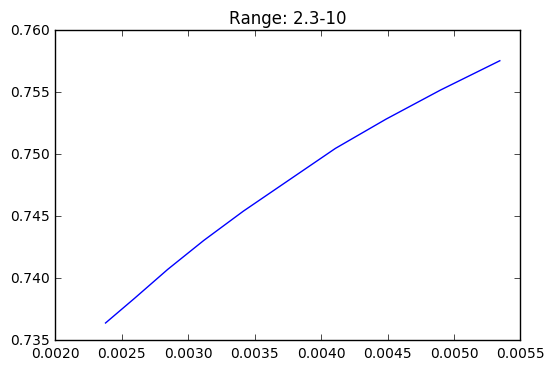

In [32]:
yspace = np.linspace(2.3,10,100)
roc_x1 = []
roc_y1 = []
for round in range(10):
    xvalue = get_xvalue(yspace[round])
    area_blue = norm.cdf((xvalue[1]-mu0)/variance0)-norm.cdf((xvalue[0]-mu0)/variance0)
    area_red = norm.cdf((xvalue[0]-mu1)/variance1)+1-norm.cdf((xvalue[1]-mu1)/variance1)
    roc_x1.append(1-area_blue)
    roc_y1.append(area_red)
#print(roc_x1[::-1])
#print(roc_y1[::-1])
plt.plot(roc_x1,roc_y1)
plt.title("Range: 2.3-10")
plt.show()

In [28]:
yspace = np.linspace(-2,200,1000)
roc_x = []
roc_y = []
for round in range(201):
    xvalue = get_xvalue(yspace[round])
    area_blue = norm.cdf((xvalue[1]-mu0)/variance0)-norm.cdf((xvalue[0]-mu0)/variance0)
    area_red = norm.cdf((xvalue[0]-mu1)/variance1)+1-norm.cdf((xvalue[1]-mu1)/variance1)
    roc_x.append(1-area_blue)
    roc_y.append(area_red)


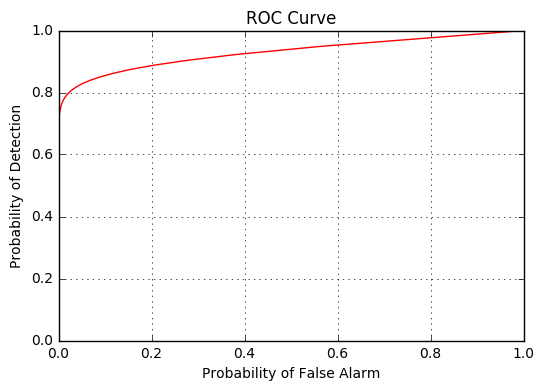

In [34]:
plt.plot(roc_x,roc_y,'r')
plt.title("ROC Curve")
plt.xlabel("Probability of False Alarm")
plt.ylim(0,1)
plt.ylabel("Probability of Detection")
plt.show()

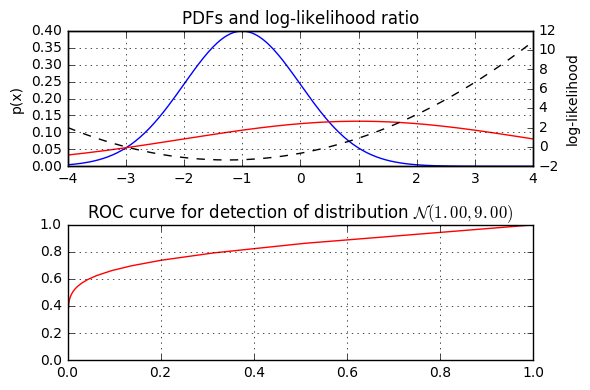

In [7]:
import numpy as np
import pandas as pd
shift = 1.0
z = np.random.randint(0,2,10)*shift
x = np.random.randn(10) + z
y = np.random.randn(10) + z
df = pd.DataFrame({'x':x, 'y':y,'z':z})

print(df)

          x         y    z
0 -1.034159 -1.075746  0.0
1 -1.897264  0.353579  0.0
2 -0.867244  0.294851  0.0
3  0.805414  1.291178  1.0
4 -0.722139 -0.029305  1.0
5  0.531151 -1.249782  0.0
6 -0.956848  0.300763  1.0
7 -0.356592 -0.746881  0.0
8  0.360786  1.280068  1.0
9  0.184757  2.746257  1.0


In [5]:
print(x = np.random.randn(10))

TypeError: 'x' is an invalid keyword argument for this function